In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
loadFile = "files/configWinCNN2/predictions/best-94-valid.npz"

In [3]:
predictions = np.load(loadFile)

# true = predictions['true']
# pred = predictions['pred']

In [4]:
predictions.files


['x', 'y', 'b', 'pred']

In [5]:
coh = predictions['x']
b = predictions['b']
y = predictions['y']
p = predictions['pred']

In [6]:
mae = np.absolute(p-y)

In [7]:
def calculateIndexes(tresh, mode='<'):
    if mode == '<':
        ind = {i: np.argwhere(mae[:,i] < tresh).transpose()[0] for i in range(mae.shape[1])}
        ind['a'] = np.argwhere(np.add(np.add(mae[:,0], mae[:,1]), mae[:,2])/mae.shape[1] < tresh).transpose()[0]
    elif mode == '>':
        ind = {i: np.argwhere(mae[:,i] > tresh).transpose()[0] for i in range(mae.shape[1])}
        ind['a'] = np.argwhere(np.add(np.add(mae[:,0], mae[:,1]), mae[:,2])/mae.shape[1] > tresh).transpose()[0]

    print({k: ind[k].shape[0] for k in ind})
    return ind


In [8]:
def plotValues(index):
    if type(index) is int:
        index = [index]
    for v in index:
        plt.plot(coh[v], label="[{:.4f}, {:.2f}, {:.1f}, {:.3f}]({})\n[{:.4f}, {:.2f}, {:.1f}, {:.3f}]".format(y[v,0], y[v,1], b[v,0], y[v,2], v, p[v,0], p[v,1], b[v,0], p[v,2]))
        # plt.plot(coh[v], label="[{:.2f}, {:.2f}, {:.2f}, {:.2f}]({})".format(*parN[v],v))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    plt.xlabel(r'$t_1 \; [\mu{\rm s}]$',fontsize=14)
    plt.ylabel(r'$C(t)$',fontsize=14)
    plt.ylim(bottom=-0.05)
    plt.show()

In [9]:
def calculateMaxValue(indexes, parameter='a'):
    all = defaultdict(int)
    maxValue = 0
    for index in indexes:
        for a in zip(y[index[parameter],0], y[index[parameter],1], y[index[parameter],2]):
            all[a] += 1
            if all[a] > maxValue:
                maxValue = all[a]

    print(maxValue)
    return maxValue

In [10]:
def plotFrequencies(index, maxValue=None, title="", parameter='a', save=False):
    all = defaultdict(int)
    # maxValue = 0
    for a in zip(y[index[parameter],0], y[index[parameter],1], y[index[parameter],2]):
        all[a] += 1
        # if all[a] > maxValue:
        #     maxValue = all[a]

    # for k in all:
    #     all[k] /= maxValue

    y0 = []
    a = []
    w1 = []
    c = []
    for k in all:
        y0.append(k[0])
        a.append(k[1])
        w1.append(k[2])
        c.append(all[k])

    y0 = np.array(y0)
    a = np.array(a)
    w1 = np.array(w1)
    c = np.array(c)
    # colors = np.array([all[(y[bad[parameter],0][i], y[bad[parameter],1][i], y[bad[parameter],2][i])] for i in range(len(bad[parameter])) ])

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # pnt = ax.scatter(y[bad[parameter],0], y[bad[parameter],1], y[bad[parameter],2], c=colors, marker='o')
    if not maxValue is None:
        pnt = ax.scatter(y0, a, w1, c=c, marker='o', vmin=1, vmax=maxValue)
    else:
        pnt = ax.scatter(y0, a, w1, c=c, marker='o', vmin=1)
    # plt.colorbar(pnt)
    ax.set_xlabel('y0')
    ax.set_ylabel('a')
    ax.set_zlabel('W1')
    ax.set_title(title, y=0.9)#, pad=-14)
    # plt.title(title)

    ax.view_init(elev=8., azim=8)

    fig.subplots_adjust(left=0, right=1.2, bottom=0.15, top=0.8)

    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(pnt, cax=cax) # Similar to fig.colorbar(im, cax = cax)

    fig.tight_layout()

    plt.show()

    if save:
        fig.savefig("/tmp/"+title+".pdf", bbox_inches='tight')
        # np.savez_compressed("/tmp/plot.npz", y0=y[bad['a'],0], a=y[bad['a'],1], w1=y[bad['a'],2], c=colors)

In [11]:
# plotValues(0)

In [12]:
# plotValues(1)

# Good

In [13]:
# plotValues(good[0][:100])

In [14]:
# plotValues(good[1][:100])


In [15]:
# plotValues(good[2][:100])

In [16]:
# plotValues(good['a'][:100])

# Bad

In [17]:
# plotValues(bad[0][:100])

In [18]:
# plotValues(bad[1][:100])


In [19]:
# plotValues(bad[2][:100])

In [20]:
# plotValues(bad['a'][:100])

# Frequencies

In [21]:
good = {t: calculateIndexes(t, '<') for t in [0.05, 0.1] }
bad = {t: calculateIndexes(t, '>') for t in [0.05, 0.1, 0.2, 0.3] }

{0: 99800, 1: 53601, 2: 58942, 'a': 24102}
{0: 183339, 1: 106903, 2: 111671, 'a': 98178}
{0: 220200, 1: 266399, 2: 261058, 'a': 295898}
{0: 136661, 1: 213097, 2: 208329, 'a': 221822}
{0: 46843, 1: 120759, 2: 120957, 'a': 90249}
{0: 16587, 1: 53735, 2: 56619, 'a': 20307}


In [22]:
# maxValue = calculateMaxValue(list(good.values()) + list(bad.values()))

<ipython-input-10-9e8c4b962099>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


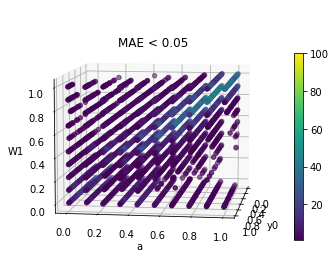

<ipython-input-10-9e8c4b962099>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


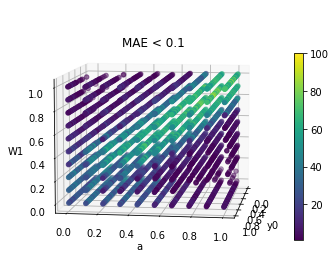

In [23]:
for t in good:
    plotFrequencies(good[t], maxValue=100, title="MAE < {}".format(t), save=True)

<ipython-input-10-9e8c4b962099>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


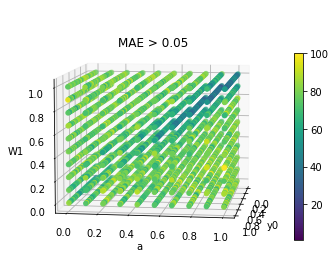

<ipython-input-10-9e8c4b962099>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


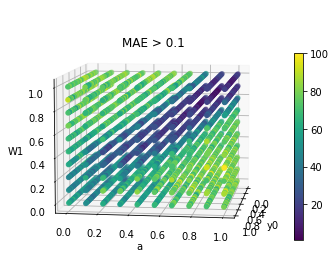

<ipython-input-10-9e8c4b962099>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


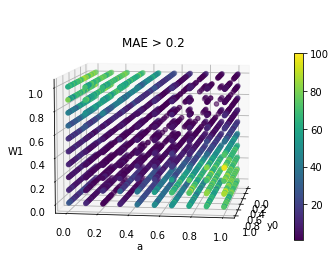

<ipython-input-10-9e8c4b962099>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


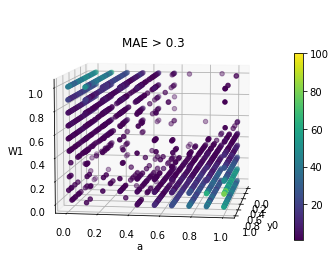

In [24]:
for t in bad:
    plotFrequencies(bad[t], maxValue=100, title="MAE > {}".format(t), save=True)